## Importing Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

### Reading Data

In [6]:
data = pd.read_csv('sleep_health.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Basic Info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Line Plot

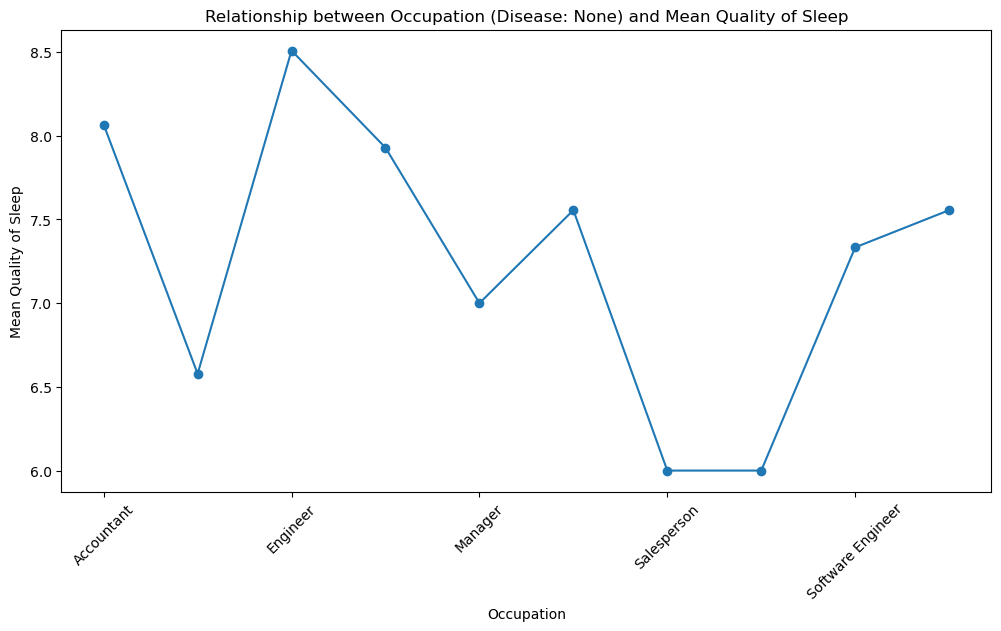

In [12]:
no_disease = data.loc[data['Sleep Disorder'] == 'None']

# Group the data by occupation and calculate the mean quality of sleep
mean_sleep_quality = no_disease.groupby('Occupation')['Quality of Sleep'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
mean_sleep_quality.plot(marker='o', linestyle='-')

# Set the axis labels and title
plt.xlabel('Occupation')
plt.ylabel('Mean Quality of Sleep')
plt.title('Relationship between Occupation (Disease: None) and Mean Quality of Sleep')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Bar Graph

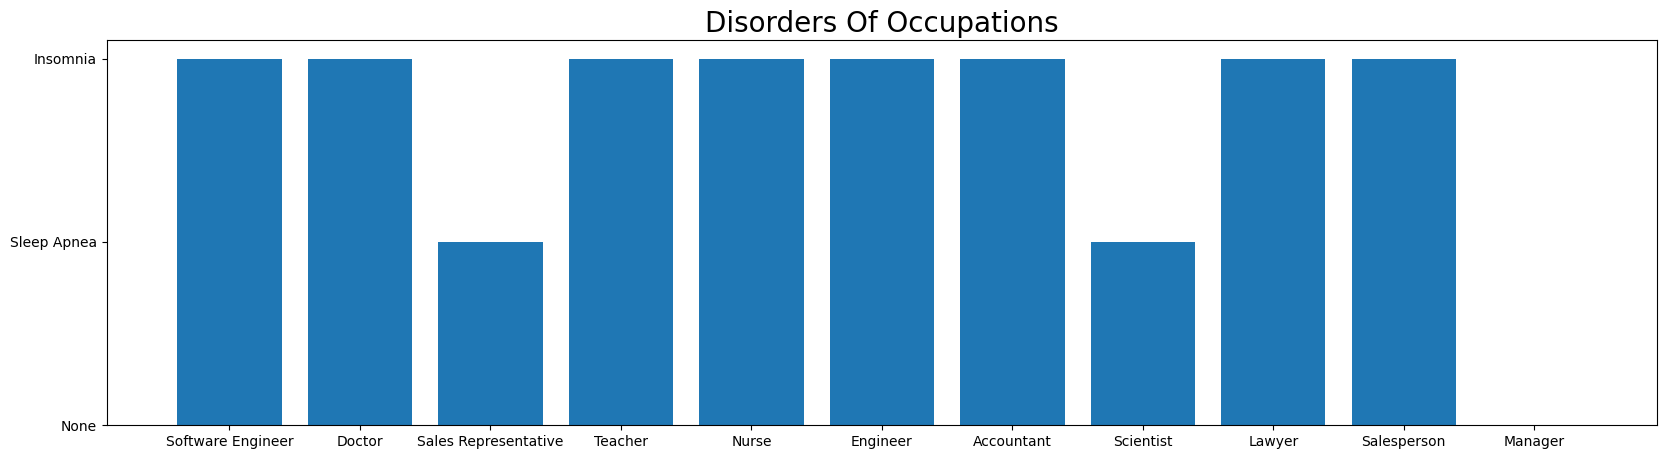

In [16]:
plt.figure(figsize=(20, 5))
occupation = data['Occupation']
disorder = data['Sleep Disorder']
plt.title('Disorders Of Occupations', fontdict={'fontsize': 20})
plt.bar(occupation, disorder)
plt.show()

### Sort Diseases By Occupation Seperately

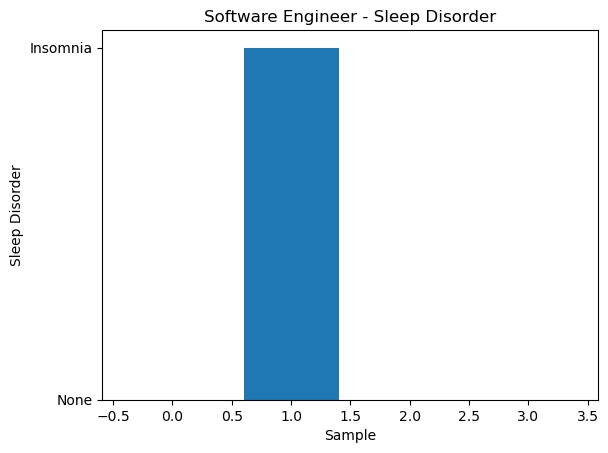

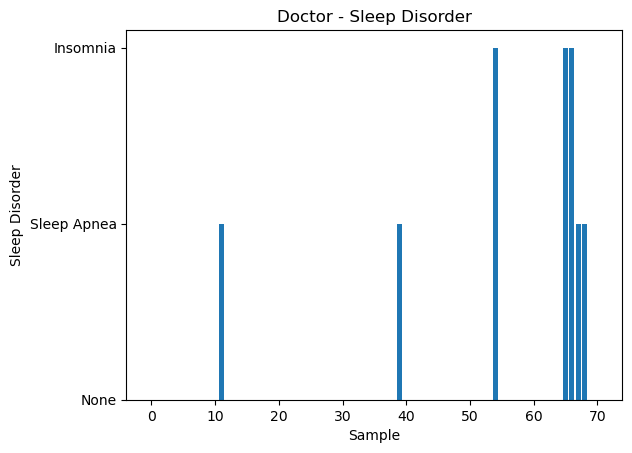

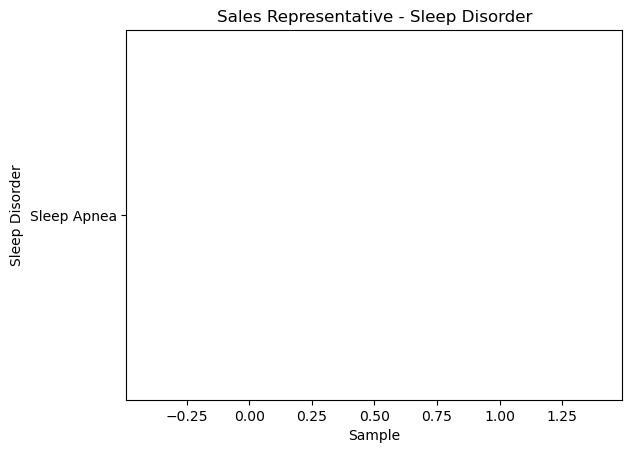

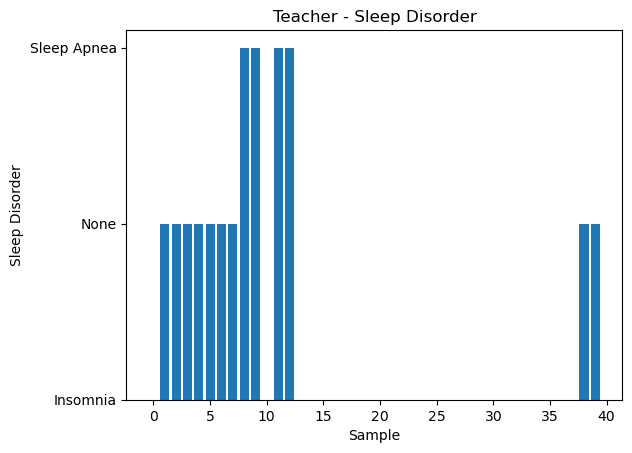

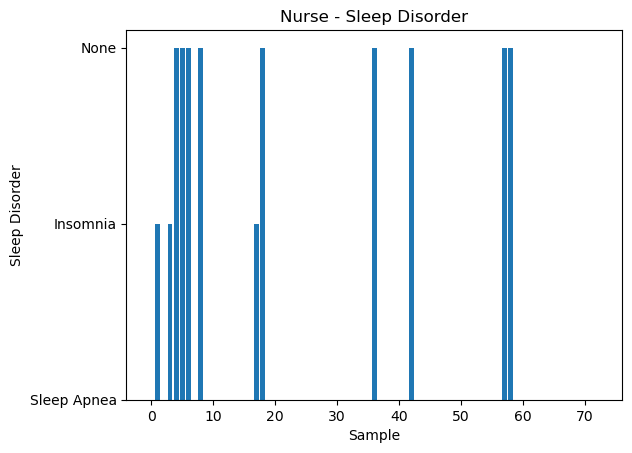

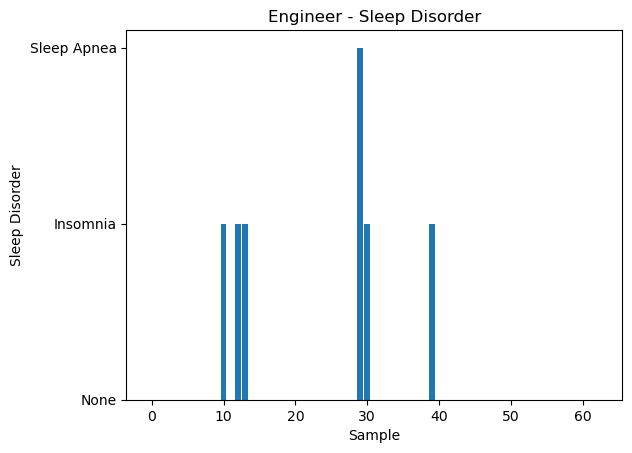

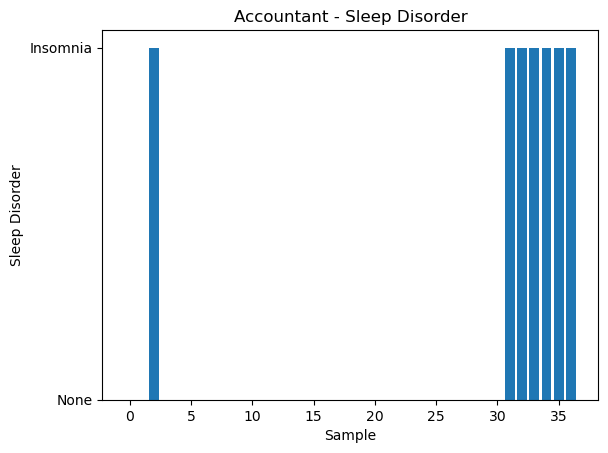

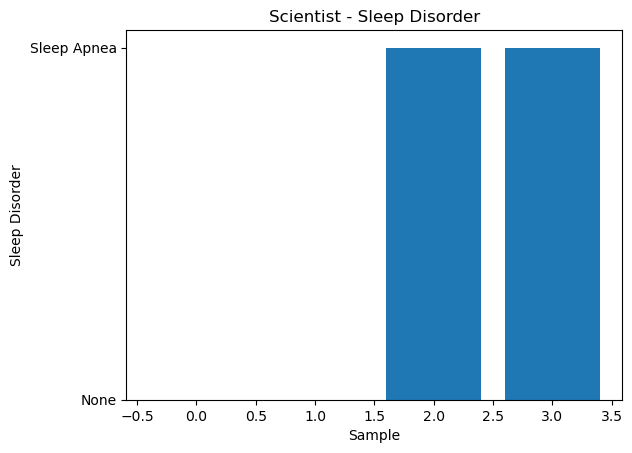

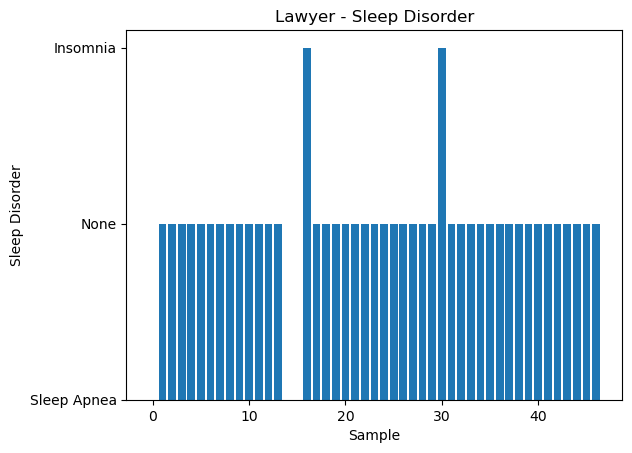

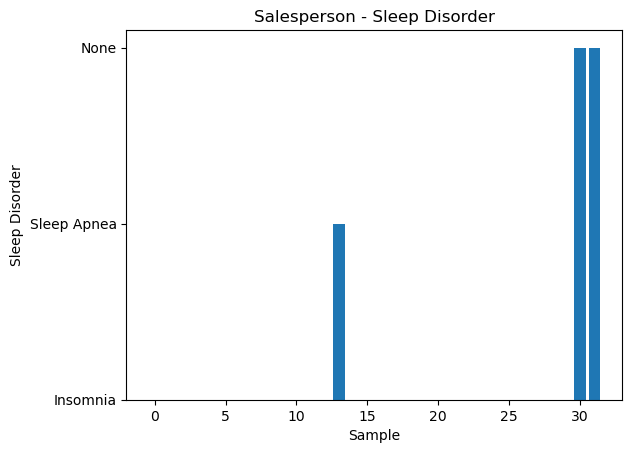

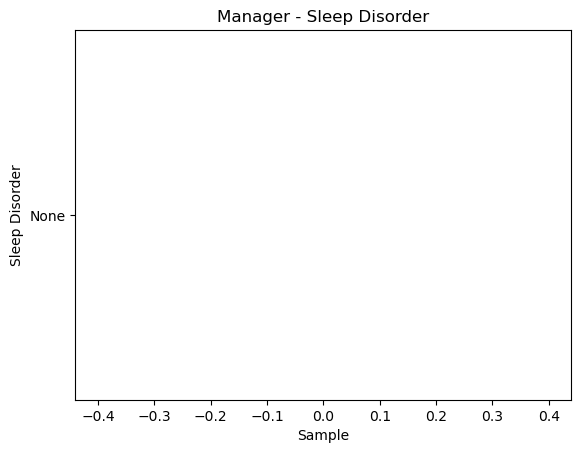

In [17]:
occupations = data['Occupation']
sleep_disorder = data['Sleep Disorder']
unique_occupations = occupations.unique()
for occupation in unique_occupations:
    occupation_data = sleep_disorder[occupations == occupation]
    
    plt.bar(range(len(occupation_data)), occupation_data)
    
    # Set labels and title
    plt.xlabel('Sample')
    plt.ylabel('Sleep Disorder')
    plt.title(f'{occupation} - Sleep Disorder')
    
    
    # Show the bar plot
    plt.show()

## Pie Chart

### Group Of Diseased & Fine Occupations

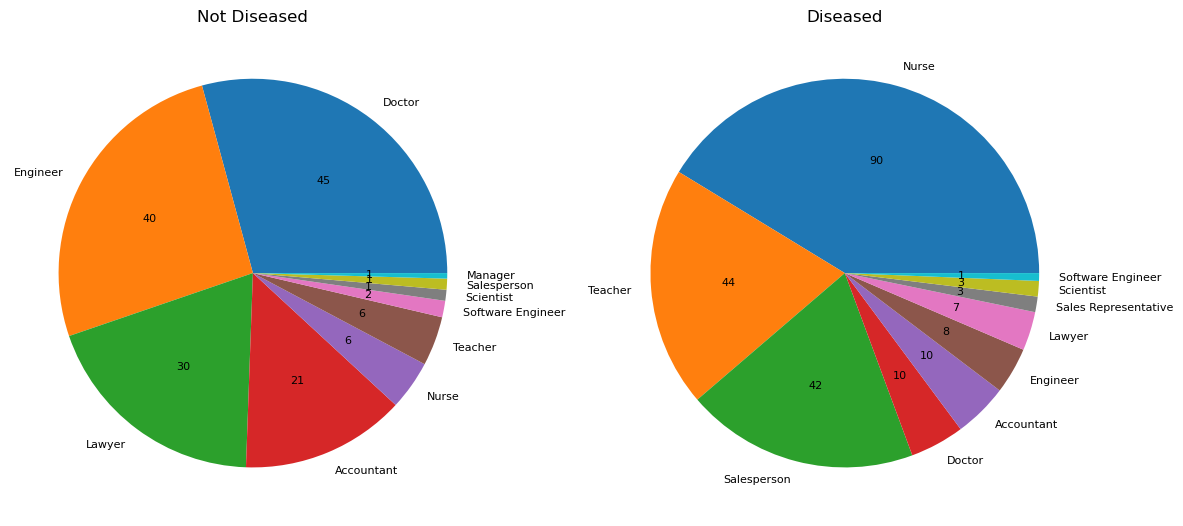

In [18]:
disorder = data[data['Sleep Disorder'] != 'None']
no_disorder = data[data['Sleep Disorder'] == 'None']

nodis_counts = no_disorder['Occupation'].value_counts()
dis_counts = disorder['Occupation'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 9))
none_percentages = nodis_counts / len(disorder) * 100
axes[0].pie(nodis_counts, labels = nodis_counts.index, autopct=lambda p: f'{p*len(disorder)/100:.0f}', textprops={'fontsize':8})
axes[0].set_title("Not Diseased")
axes[1].pie(dis_counts, labels = dis_counts.index, autopct=lambda p: f'{p*len(no_disorder)/100:.0f}', textprops={'fontsize':8})
axes[1].set_title("Diseased")
plt.tight_layout()
plt.show()

## Box Plot

<Figure size 1200x600 with 0 Axes>

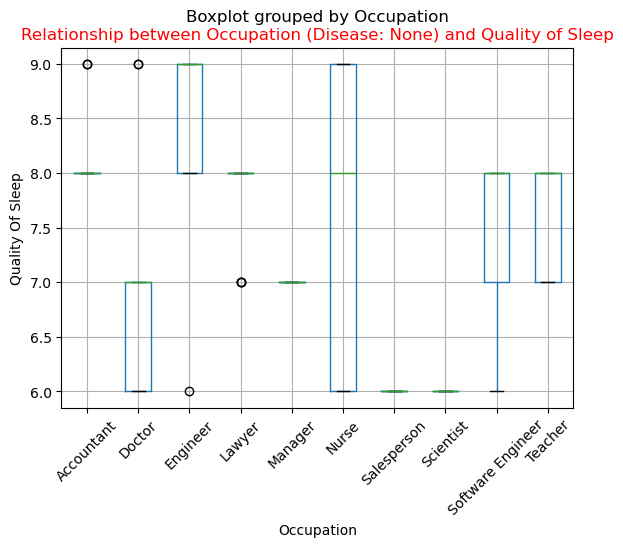

In [19]:
plt.style.use('default')
disease = data[data['Sleep Disorder'] == 'None']
plt.figure(figsize=(12, 6))
disease.boxplot(column = "Quality of Sleep", by='Occupation')
plt.ylabel('Quality Of Sleep')
plt.title('Relationship between Occupation (Disease: None) and Quality of Sleep', fontdict={'color': 'r', 'fontsize': 12})

plt.xticks(rotation=45)
plt.show()